In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings 
warnings.filterwarnings("ignore")

 Data Source :

This dataset is a synthetic version inspired by the original Credit Risk dataset on Kaggle and enriched with additional variables based on Financial Risk for Loan Approval data. SMOTENC was used to simulate new data points to enlarge the instances. The dataset is structured for both categorical and continuous features.
 
Data Usage :
The dataset can be used for multiple purposes:

Exploratory Data Analysis (EDA): Analyze key features, distribution patterns, and relationships to understand credit risk factors.
Classification: Build predictive models to classify the loan_status variable (approved/not approved) for potential applicants.
Regression: Develop regression models to predict the credit_score variable based on individual and loan-related attributes.
Mind the data issue from the original data, such as the instance > 100-year-old as age.

This dataset provides a rich basis for understanding financial risk factors and simulating predictive modeling processes for loan approval and credit scoring.

Feel free to leave 

In [2]:
data = pd.read_csv("loan_data.csv")
data 

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [3]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
data.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [5]:
data.sample(8)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
14961,23.0,female,Bachelor,144831.0,2,OWN,3600.0,VENTURE,10.59,0.02,4.0,646,Yes,0
7726,25.0,female,Master,66380.0,2,MORTGAGE,12000.0,HOMEIMPROVEMENT,9.63,0.18,4.0,623,No,0
11194,25.0,female,High School,87498.0,2,MORTGAGE,3200.0,EDUCATION,6.39,0.04,3.0,640,Yes,0
19948,33.0,male,High School,80182.0,9,RENT,10600.0,PERSONAL,12.99,0.13,7.0,670,Yes,0
20324,28.0,male,Bachelor,35783.0,7,RENT,4200.0,MEDICAL,7.51,0.12,5.0,649,No,0
1671,23.0,male,Bachelor,22421.0,0,RENT,1700.0,PERSONAL,11.11,0.08,3.0,611,Yes,0
42126,22.0,female,Bachelor,36912.0,0,RENT,7000.0,MEDICAL,10.13,0.19,4.0,661,No,1
31477,40.0,female,High School,118736.0,20,MORTGAGE,5200.0,VENTURE,9.63,0.04,16.0,661,Yes,0


In [6]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [7]:
data.columns.nunique()

14

In [8]:
data.nunique()

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [12]:
for i in data.columns : 
    Max = data[i].max()
    Min = data[i].min()
    print(i, ":")
    print("the Max :" , Max)
    print("The Min : ", Min) 
    print("*********************************")

person_age :
the Max : 144.0
The Min :  20.0
*********************************
person_gender :
the Max : male
The Min :  female
*********************************
person_education :
the Max : Master
The Min :  Associate
*********************************
person_income :
the Max : 7200766.0
The Min :  8000.0
*********************************
person_emp_exp :
the Max : 125
The Min :  0
*********************************
person_home_ownership :
the Max : RENT
The Min :  MORTGAGE
*********************************
loan_amnt :
the Max : 35000.0
The Min :  500.0
*********************************
loan_intent :
the Max : VENTURE
The Min :  DEBTCONSOLIDATION
*********************************
loan_int_rate :
the Max : 20.0
The Min :  5.42
*********************************
loan_percent_income :
the Max : 0.66
The Min :  0.0
*********************************
cb_person_cred_hist_length :
the Max : 30.0
The Min :  2.0
*********************************
credit_score :
the Max : 850
The Min :  390
********

In [13]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [14]:
gender =data.person_gender.value_counts()
gender 

person_gender
male      24841
female    20159
Name: count, dtype: int64

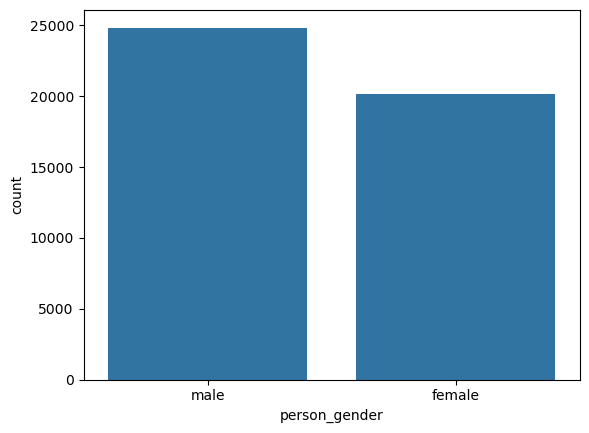

In [15]:
sns.barplot(gender )
plt.show()

In [16]:
data.person_education.value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

<Axes: xlabel='person_education'>

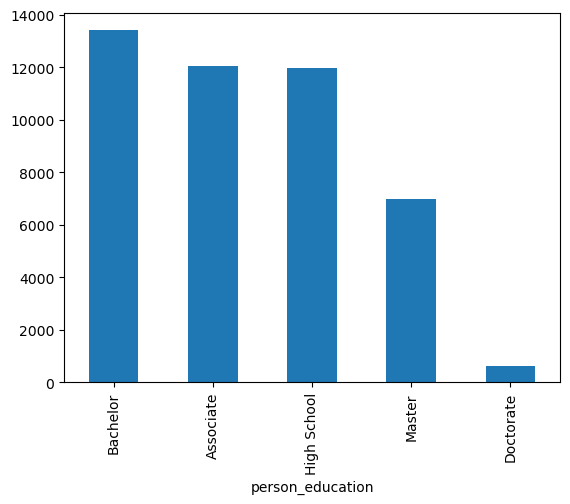

In [17]:
data.person_education.value_counts().plot(kind="bar")

In [18]:
data.person_home_ownership.value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

<Axes: ylabel='count'>

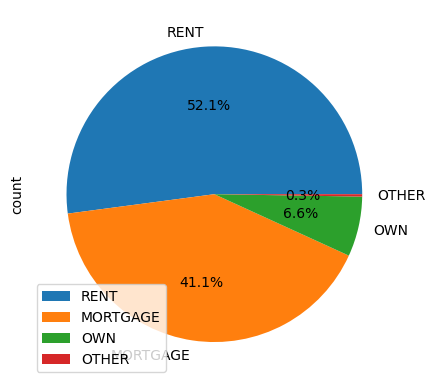

In [19]:
data.person_home_ownership.value_counts().plot(kind="pie" , autopct ="%1.1f%%",legend=True)

In [20]:
data.loan_intent.value_counts()


loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

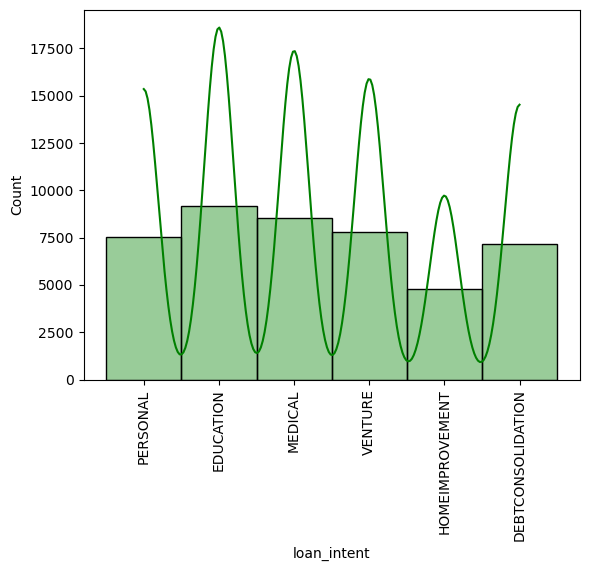

In [21]:
plt.Figure(figsize=(8,8))
sns.histplot(data['loan_intent'], bins=30, color='g', alpha=0.4, kde=True)
plt.xticks(rotation=90)
plt.show()

In [22]:
data["person_home_ownership"].value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

<Axes: xlabel='person_home_ownership'>

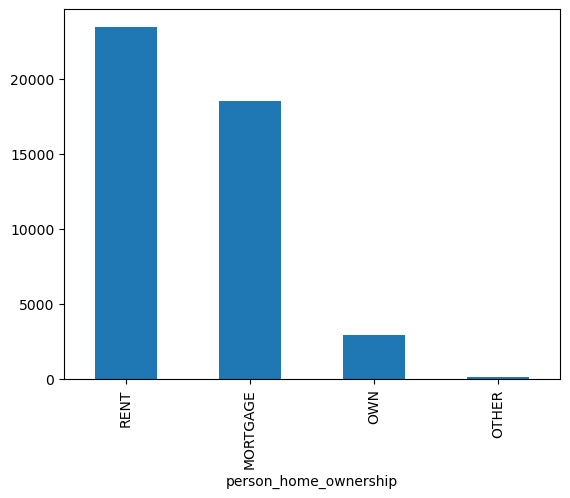

In [23]:
data["person_home_ownership"].value_counts().plot(kind="bar")

In [24]:
data["previous_loan_defaults_on_file"].value_counts()

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

<Axes: xlabel='previous_loan_defaults_on_file'>

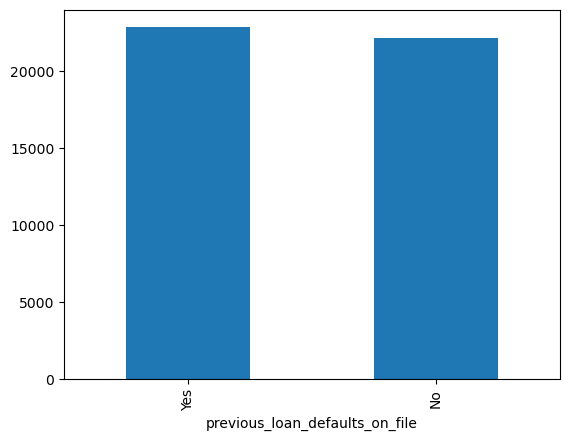

In [25]:
data["previous_loan_defaults_on_file"].value_counts().plot(kind="bar")

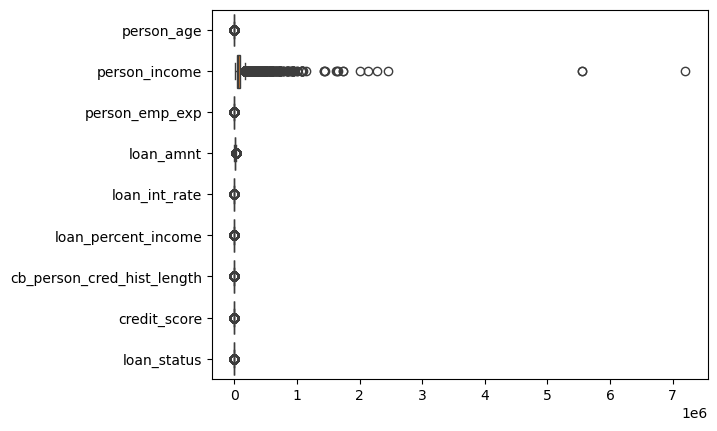

In [26]:
sns.boxplot(data=data, orient="h")
plt.show()

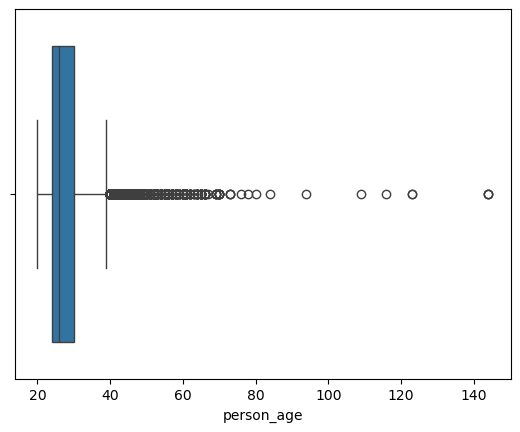

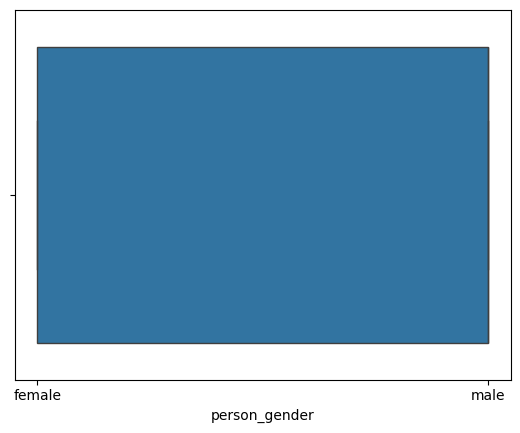

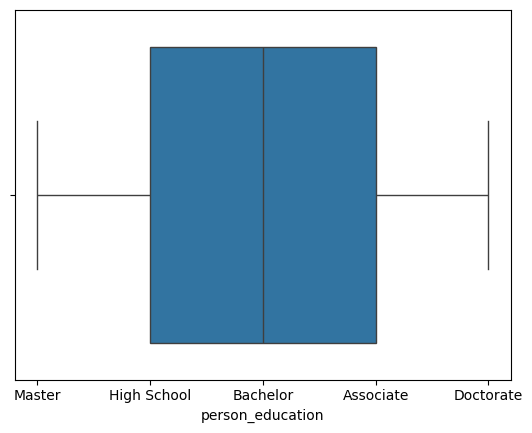

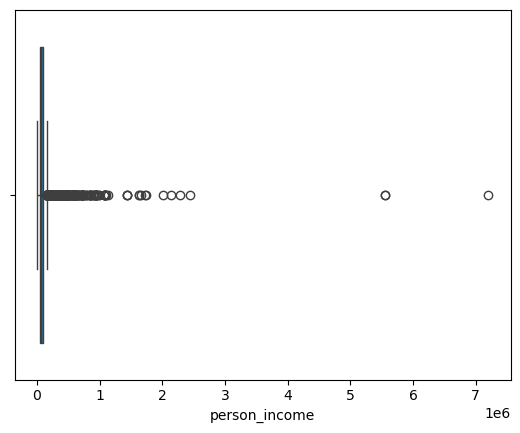

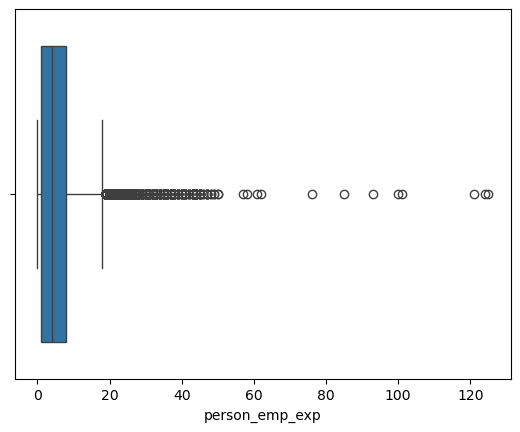

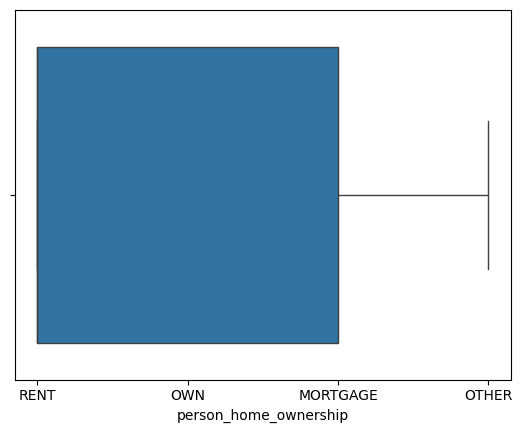

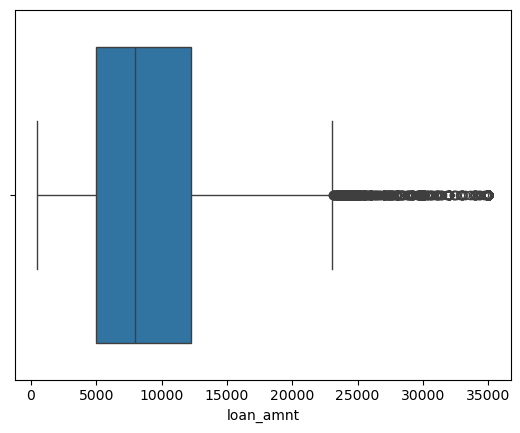

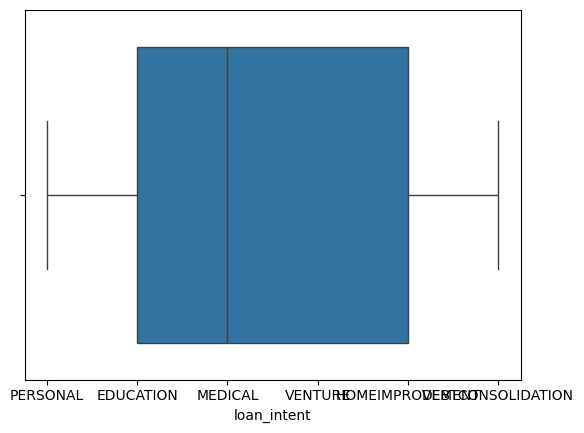

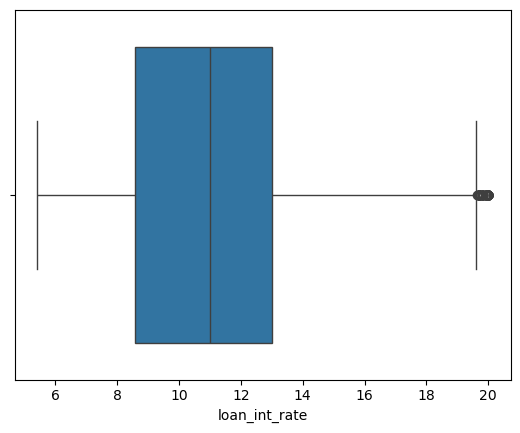

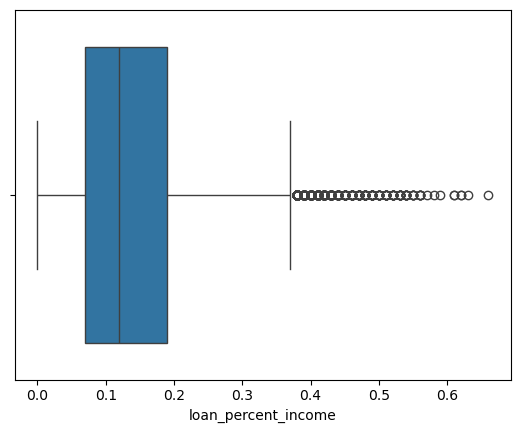

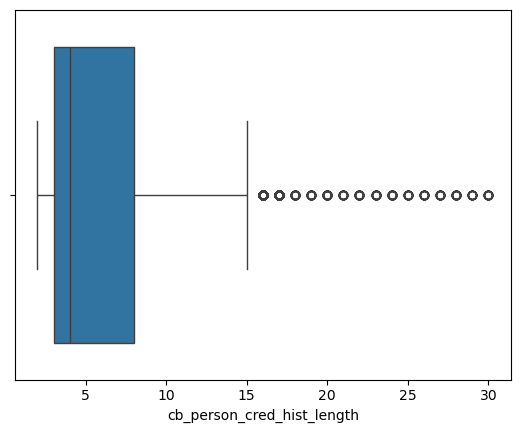

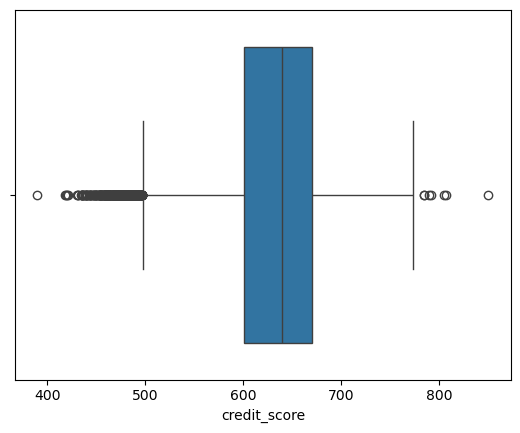

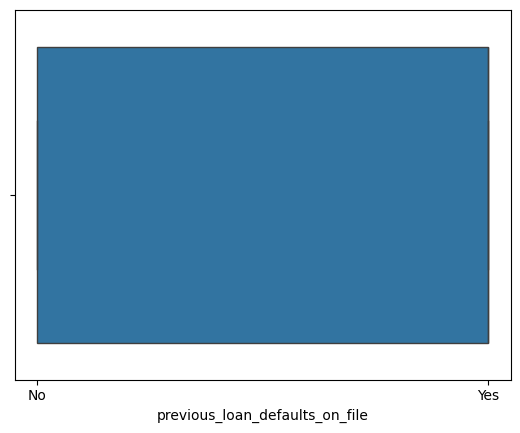

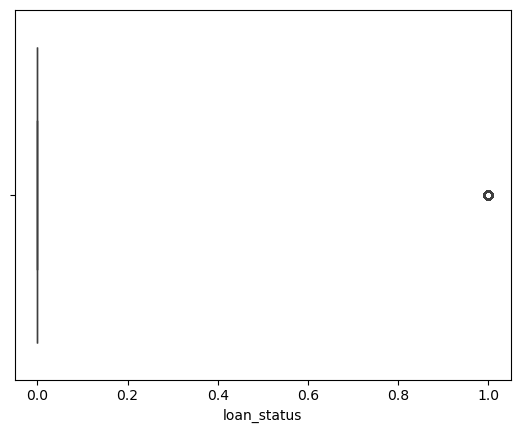

In [27]:
for i in data.columns : 
    sns.boxplot(data=data[i], orient="h")
    plt.show()

In [201]:
q1 = data["person_income"].quantile(0.25)
q3 = data["person_income"].quantile(0.75)
IQR = q3-q1 
UB = q3+1.5 * IQR 
LB = q1 -1.5*IQR  


In [203]:
UB

168667.125

In [204]:
LB

-25673.875

In [121]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [123]:
data.groupby("person_age")["loan_intent"].value_counts().to_frame()

count
person_age loan_intent             
20.0       VENTURE                7
           EDUCATION              5
           DEBTCONSOLIDATION      2
           PERSONAL               2
           MEDICAL                1
...                             ...
123.0      EDUCATION              1
           VENTURE                1
144.0      EDUCATION              1
           PERSONAL               1
           VENTURE                1

[283 rows x 1 columns]

In [124]:
data.groupby(["person_age","person_gender","person_education"]).loan_status.value_counts().to_frame()

count
person_age person_gender person_education loan_status       
20.0       female        Associate        0                2
                         High School      0                4
                         Master           0                1
                                          1                1
           male          Associate        0                3
...                                                      ...
123.0      female        High School      0                1
           male          Bachelor         0                1
144.0      female        Associate        0                1
           male          Associate        0                1
                         Bachelor         0                1

[732 rows x 1 columns]

In [125]:
data.groupby(["person_education","person_income"]).loan_intent.value_counts().to_frame()

count
person_education person_income loan_intent             
Associate        8000.0        EDUCATION              1
                               VENTURE                1
                 8037.0        HOMEIMPROVEMENT        1
                 8186.0        PERSONAL               1
                 8277.0        VENTURE                1
...                                                 ...
Master           726416.0      MEDICAL                1
                 736127.0      MEDICAL                1
                 838950.0      DEBTCONSOLIDATION      1
                 936965.0      PERSONAL               1
                 1080918.0     DEBTCONSOLIDATION      1

[44356 rows x 1 columns]

In [126]:
data.groupby(["person_gender","person_education","person_emp_exp"])["loan_int_rate"].value_counts().to_frame()

count
person_gender person_education person_emp_exp loan_int_rate       
female        Associate        0              11.01             79
                                              10.99             20
                                              7.51              19
                                              7.49              17
                                              7.88              15
...                                                            ...
male          Master           39             16.29              1
                               40             6.91               1
                                              13.98              1
                               41             11.01              1
                               48             14.79              1

[24221 rows x 1 columns]

In [127]:
owerhome=data.groupby(["person_age","person_gender"]).person_home_ownership.value_counts().to_frame()
owerhome

count
person_age person_gender person_home_ownership       
20.0       female        MORTGAGE                   5
                         RENT                       2
                         OWN                        1
           male          MORTGAGE                   7
                         RENT                       2
...                                               ...
123.0      female        RENT                       1
           male          RENT                       1
144.0      female        MORTGAGE                   1
           male          MORTGAGE                   1
                         RENT                       1

[307 rows x 1 columns]

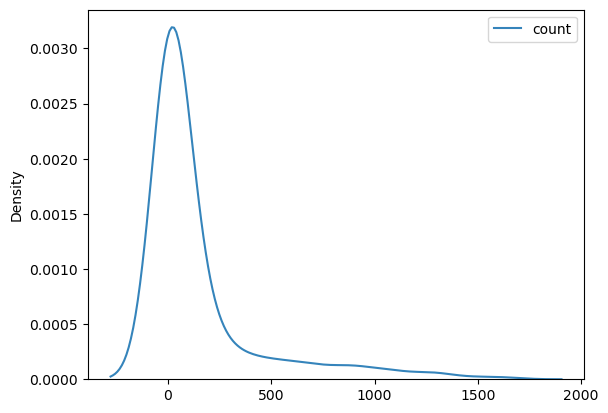

In [128]:
plt.Figure(figsize=(20,10))
# Density Plot
sns.kdeplot(owerhome, fill=False, color='r', alpha=0.9)

plt.show()

In [129]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [130]:
data.groupby("person_education").cb_person_cred_hist_length.value_counts().to_frame()

count
person_education cb_person_cred_hist_length       
Associate        4.0                          2198
                 3.0                          2148
                 2.0                          1673
                 5.0                           801
                 6.0                           787
...                                            ...
Master           26.0                            2
                 29.0                            2
                 19.0                            1
                 25.0                            1
                 27.0                            1

[141 rows x 1 columns]

In [131]:
pd.crosstab(data.person_education,data.loan_percent_income)

loan_percent_income,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.54,0.55,0.56,0.57,0.58,0.59,0.61,0.62,0.63,0.66
person_education,,,,,,,,,,,,,,,,,,,,,
Associate,8,78,247,420,505,578,605,637,641,624,...,3,0,2,1,0,1,2,0,0,1
Bachelor,4,120,272,447,574,648,664,734,798,688,...,2,2,2,0,0,0,0,1,1,0
Doctorate,0,4,20,16,25,27,32,34,44,34,...,0,0,0,0,0,0,0,0,0,0
High School,12,74,250,363,516,575,585,643,695,617,...,3,2,0,0,0,0,0,1,0,0
Master,3,39,155,242,330,348,356,367,415,332,...,0,1,1,0,1,0,0,0,0,0


In [132]:
le = LabelEncoder()
data["person_gender"] = le.fit_transform(data["person_gender"])
data["previous_loan_defaults_on_file"] = le.fit_transform(data["previous_loan_defaults_on_file"])

In [133]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,0,1
1,21.0,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0
2,25.0,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,0,1
3,23.0,0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,0,1
4,24.0,1,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,0,1


In [134]:
encoding_home=pd.get_dummies(data.person_home_ownership).astype(int)
encoding_home



,MORTGAGE,OTHER,OWN,RENT
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
44995,0,0,0,1
44996,0,0,0,1
44997,0,0,0,1
44998,0,0,0,1


In [135]:
encoding_loan=pd.get_dummies(data.loan_intent).astype(int)
encoding_loan


,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,0,0,0,0,1,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
44995,0,0,0,1,0,0
44996,0,0,1,0,0,0
44997,1,0,0,0,0,0
44998,0,1,0,0,0,0


In [136]:
encoding_educatiom=pd.get_dummies(data.person_education).astype(int) 
encoding_educatiom

,Associate,Bachelor,Doctorate,High School,Master
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
44995,1,0,0,0,0
44996,1,0,0,0,0
44997,1,0,0,0,0
44998,0,1,0,0,0


In [142]:
finaldata = pd.concat([data,encoding_educatiom,encoding_home,encoding_loan],axis=1)
finaldata

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,...,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22.0,0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,...,0,0,0,1,0,0,0,0,1,0
1,21.0,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,...,0,0,1,0,0,1,0,0,0,0
2,25.0,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,...,1,0,0,0,0,0,0,1,0,0
3,23.0,0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,...,0,0,0,1,0,0,0,1,0,0
4,24.0,1,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,...,0,0,0,1,0,0,0,1,0,0
44996,37.0,0,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,...,0,0,0,1,0,0,1,0,0,0
44997,33.0,1,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,...,0,0,0,1,1,0,0,0,0,0
44998,29.0,1,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,...,0,0,0,1,0,1,0,0,0,0


In [145]:
finaldata.drop(["person_education","person_home_ownership","loan_intent"],axis=1 ,inplace=True)

In [146]:
finaldata

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22.0,0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,...,0,0,0,1,0,0,0,0,1,0
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,0,0,1,0,0,1,0,0,0,0
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,...,1,0,0,0,0,0,0,1,0,0
3,23.0,0,79753.0,0,35000.0,15.23,0.44,2.0,675,0,...,0,0,0,1,0,0,0,1,0,0
4,24.0,1,66135.0,1,35000.0,14.27,0.53,4.0,586,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,47971.0,6,15000.0,15.66,0.31,3.0,645,0,...,0,0,0,1,0,0,0,1,0,0
44996,37.0,0,65800.0,17,9000.0,14.07,0.14,11.0,621,0,...,0,0,0,1,0,0,1,0,0,0
44997,33.0,1,56942.0,7,2771.0,10.02,0.05,10.0,668,0,...,0,0,0,1,1,0,0,0,0,0
44998,29.0,1,33164.0,4,12000.0,13.23,0.36,6.0,604,0,...,0,0,0,1,0,1,0,0,0,0


In [199]:
x  = finaldata.drop("loan_status",axis=1)
y = finaldata.loan_status

In [148]:
x

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22.0,0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,...,0,0,0,1,0,0,0,0,1,0
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,0,0,1,0,0,1,0,0,0,0
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,...,1,0,0,0,0,0,0,1,0,0
3,23.0,0,79753.0,0,35000.0,15.23,0.44,2.0,675,0,...,0,0,0,1,0,0,0,1,0,0
4,24.0,1,66135.0,1,35000.0,14.27,0.53,4.0,586,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,47971.0,6,15000.0,15.66,0.31,3.0,645,0,...,0,0,0,1,0,0,0,1,0,0
44996,37.0,0,65800.0,17,9000.0,14.07,0.14,11.0,621,0,...,0,0,0,1,0,0,1,0,0,0
44997,33.0,1,56942.0,7,2771.0,10.02,0.05,10.0,668,0,...,0,0,0,1,1,0,0,0,0,0
44998,29.0,1,33164.0,4,12000.0,13.23,0.36,6.0,604,0,...,0,0,0,1,0,1,0,0,0,0


In [149]:
y

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 45000, dtype: int64

In [150]:
xtrain , xtest , ytrain ,ytest = train_test_split(x,y , train_size=.8)

In [151]:
xtrain

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
18153,32.0,0,128134.0,11,25000.0,16.63,0.20,7.0,577,0,...,0,0,0,1,1,0,0,0,0,0
24932,28.0,0,76478.0,5,11200.0,12.99,0.15,7.0,593,0,...,0,0,0,1,0,1,0,0,0,0
41246,23.0,1,49255.0,2,5000.0,5.44,0.10,3.0,680,1,...,1,0,0,0,0,0,0,1,0,0
6130,22.0,0,26463.0,0,6000.0,15.96,0.23,3.0,683,1,...,0,0,0,1,1,0,0,0,0,0
27029,27.0,1,144956.0,1,8400.0,7.14,0.06,8.0,562,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32774,29.0,0,168751.0,9,25000.0,10.33,0.15,6.0,612,1,...,1,0,0,0,0,0,1,0,0,0
6366,24.0,0,44371.0,3,6000.0,14.96,0.14,2.0,635,1,...,0,0,0,1,0,0,0,1,0,0
15863,24.0,0,162994.0,2,16000.0,10.62,0.10,2.0,504,1,...,0,0,0,1,0,0,0,0,0,1
21855,29.0,1,53452.0,4,10000.0,14.74,0.19,5.0,621,0,...,1,0,0,0,1,0,0,0,0,0


In [194]:
ytest

21715    0
15164    0
35557    0
39334    0
28181    0
        ..
28418    0
5804     0
1896     1
6735     1
15785    0
Name: loan_status, Length: 9000, dtype: int64

In [153]:
ytrain

18153    1
24932    0
41246    0
6130     0
27029    0
        ..
32774    0
6366     0
15863    0
21855    1
33255    0
Name: loan_status, Length: 36000, dtype: int64

In [154]:
ytest

21715    0
15164    0
35557    0
39334    0
28181    0
        ..
28418    0
5804     0
1896     1
6735     1
15785    0
Name: loan_status, Length: 9000, dtype: int64

In [155]:
model = RandomForestClassifier()

In [156]:
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [157]:
model.score(xtrain,ytrain)

1.0

In [159]:
model.score(xtest,ytest)

0.9235555555555556

In [161]:
actual_value = ytest.values 
actual_value

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [162]:
predictions = model.predict(xtest)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [163]:
print(classification_report(actual_value,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6986
           1       0.89      0.76      0.82      2014

    accuracy                           0.92      9000
   macro avg       0.91      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000



In [164]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
tree = DecisionTreeClassifier()

In [166]:
tree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [167]:
tree.score(xtrain,ytrain)

1.0

In [168]:
actual_value = ytest.values 
actual_value

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [169]:
predictions = model.predict(xtest)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [170]:
print(classification_report(actual_value,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6986
           1       0.89      0.76      0.82      2014

    accuracy                           0.92      9000
   macro avg       0.91      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000



In [171]:
from sklearn.metrics import confusion_matrix 

In [172]:
cm = confusion_matrix(actual_value,predictions)
cm 

array([[6788,  198],
       [ 490, 1524]], dtype=int64)

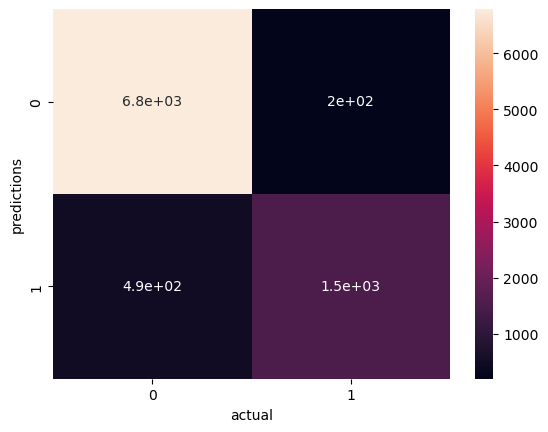

In [173]:
sns.heatmap(cm , annot=True)
plt.xlabel("actual")
plt.ylabel("predictions")
plt.show()

In [177]:
def mis_confunsion_matrix(cm):
    counter = 0 
    for i in range(len(len)):
        for j in range(len(cm)) : 
            if i == j : 
                continue
            counter += cm[i][j] 
            return counter
        


In [178]:
import xgboost as xgb 

In [179]:
model = xgb.XGBClassifier(objective="multi:softmax" , num_class= 3, random=42)

In [180]:
model.fit(xtrain,ytrain)

c:\Users\Win_11\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:59:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "random" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [181]:
model.score(xtrain,ytrain)

0.9711388888888889

In [182]:
actual_value = ytest.values 
actual_value

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [183]:
predictions = model.predict(xtest)
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [184]:
print(classification_report(actual_value,predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6986
           1       0.88      0.80      0.84      2014

    accuracy                           0.93      9000
   macro avg       0.91      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000

